## Install the necessary python libraries

In [1]:
!pip install networkx pandas numpy matplotlib community python-louvain

import networkx as nx
import numpy as np
import pandas as pd
from community import community_louvain
import matplotlib.pyplot as plt

### Centrality measurements

In [ ]:
import networkx as nx
import networkx
import matplotlib.pyplot as plt

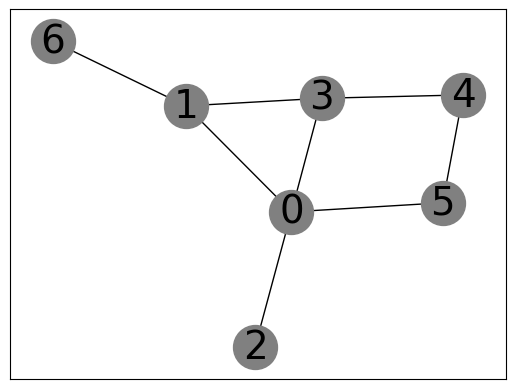

In [3]:
G = nx.Graph()
#nx.draw(G, pos=nx.spiral_layout(G), with_labels=True)
options = {
    'node_color': 'gray',      # color of node
    'node_size': 1000,          # size of node
    'width': 1                 # line width of edges
}
G.add_edges_from([(0, 1), (0, 2),(0, 3),(0, 5), (1, 3),(1, 6),(3, 4), (4, 5)])
nx.draw_networkx(G,  with_labels = True, font_size = 28,  **options)

##### Degree centrality

In [4]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{0: 0.6666666666666666,
 1: 0.5,
 2: 0.16666666666666666,
 3: 0.5,
 5: 0.3333333333333333,
 6: 0.16666666666666666,
 4: 0.3333333333333333}

##### Closeness centrality

In [5]:
closeness_centrality = nx.closeness_centrality(G)
print(closeness_centrality)

{0: 0.75, 1: 0.6666666666666666, 2: 0.46153846153846156, 3: 0.6666666666666666, 5: 0.5454545454545454, 6: 0.42857142857142855, 4: 0.5}


##### betweenness centrality

In [6]:
betweenness_centrality = nx.betweenness_centrality(G)
#Sort for identifying most inflential nodes using betweenness_centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
    print(node, betweenness_centrality[node])


0 0.5
1 0.3333333333333333
3 0.2
5 0.06666666666666667
4 0.03333333333333333
2 0.0
6 0.0


##### Eigenvector centrality

In [7]:
eigenvector_centrality = nx.eigenvector_centrality(G)
#Sort for identifying most inflential nodes using eigenvector centrality
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
  print(node, eigenvector_centrality[node])

0 0.5466171599296071
3 0.48632117147221293
1 0.4501962188594848
5 0.31765032517663433
4 0.30121698898723576
2 0.20479604791711345
6 0.16867109530438523


##### Katz centrality

In [8]:
kat_centrality = nx.katz_centrality(G)

#Sort for identifying most inflential nodes using kat_centrality
for node in sorted(kat_centrality, key=kat_centrality.get, reverse=True):
  print(node, kat_centrality[node])

0 0.43672065299897783
3 0.4064861486272437
1 0.40312676317584595
5 0.3661734879013164
4 0.3634248984420812
2 0.32983100861894943
6 0.32647162316755163


##### PageRank centrality

In [9]:
#Caculate pagerank

nx.pagerank(G,alpha=0.1)

{0: 0.15864622882679305,
 1: 0.15071645105360815,
 2: 0.1325375747492284,
 3: 0.14457986774783213,
 5: 0.13955598923886683,
 6: 0.13359530708039388,
 4: 0.14036858130327748}

# Social Network
## Load sample social network

In [2]:
df = pd.read_csv("data/edge_list.csv")

graph = nx.from_pandas_edgelist(df,source="A",target="B")

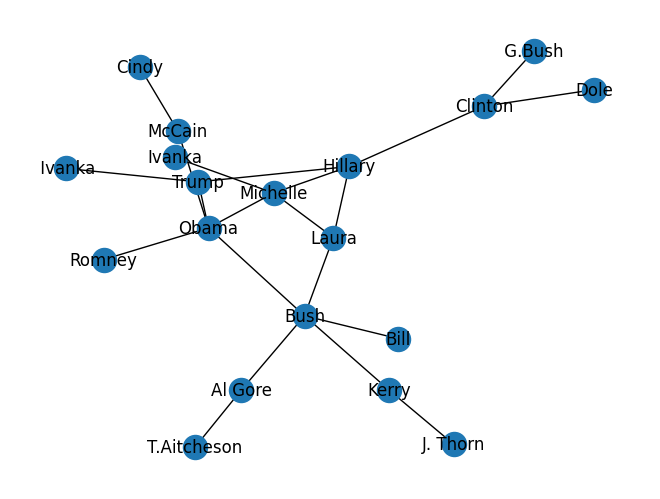

In [3]:
nx.draw(graph, with_labels = True)

In [17]:
def find_neighbors(G, node):
    print(f"neighbours of node {node}:")
    for u in nx.all_neighbors(G, node):
        print (u, end = ' ')
        
find_neighbors(graph, "Obama")

neighbours of node Obama:
Michelle McCain Romney Bush Trump 

## Checking node degree

In [19]:
# Degree of all nodes
for n in graph.nodes():
    # Degree of a node 
    print(f"+ {n}: {nx.degree(graph, n)}")

+ Clinton: 3
+ Hillary: 4
+ Bush: 5
+ Laura: 3
+ Obama: 5
+ Michelle: 4
+ Trump: 3
+  Ivanka: 1
+  G.Bush : 1
+ Dole: 1
+ Al Gore: 2
+ Kerry: 2
+ McCain: 2
+ Romney: 1
+ Bill: 1
+ Ivanka: 1
+ J. Thorn: 1
+ T.Aitcheson: 1
+ Cindy: 1


## Influential rate
### Degree centrality

In [5]:
# Most Influential People
degree_centrality = nx.degree_centrality(graph)
for person in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
    print(f"{person}: {degree_centrality[person]}")

Bush: 0.2777777777777778
Obama: 0.2777777777777778
Hillary: 0.2222222222222222
Michelle: 0.2222222222222222
Clinton: 0.16666666666666666
Laura: 0.16666666666666666
Trump: 0.16666666666666666
Al Gore: 0.1111111111111111
Kerry: 0.1111111111111111
McCain: 0.1111111111111111
 Ivanka: 0.05555555555555555
 G.Bush : 0.05555555555555555
Dole: 0.05555555555555555
Romney: 0.05555555555555555
Bill: 0.05555555555555555
Ivanka: 0.05555555555555555
J. Thorn: 0.05555555555555555
T.Aitcheson: 0.05555555555555555
Cindy: 0.05555555555555555


### Eigenvector centrality

In [6]:
# Most important people based on eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(graph)
for person in sorted(eigen_centrality, key=eigen_centrality.get, reverse=True):
    print(f"{person}: {eigen_centrality[person]}")

Obama: 0.4266565483896092
Michelle: 0.41352797669954305
Hillary: 0.3844215944154331
Bush: 0.36961806064013986
Laura: 0.36852963127385646
Trump: 0.2843345252706339
Clinton: 0.151529287137245
McCain: 0.14957130173861366
Romney: 0.13466969692277045
Ivanka: 0.13052504916898053
Al Gore: 0.12957724264199433
Kerry: 0.12957724264199433
Bill: 0.11666706333937447
 Ivanka: 0.08974661863249653
 G.Bush : 0.04782770964575168
Dole: 0.04782770964575168
Cindy: 0.047210688306275804
J. Thorn: 0.04090043619100647
T.Aitcheson: 0.04090043619100647


### Betweenness centrality

In [7]:
# Most important people based on betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)
for person in sorted(betweenness_centrality, key=betweenness_centralitys_centrality.get, reverse=True):
    print(f"{person}: {betweenness_centrality[person]}")

Bush: 0.4901960784313726
Obama: 0.43790849673202614
Hillary: 0.32026143790849676
Clinton: 0.21568627450980393
Laura: 0.19607843137254902
Michelle: 0.17647058823529413
Trump: 0.16339869281045752
Al Gore: 0.11111111111111112
Kerry: 0.11111111111111112
McCain: 0.11111111111111112
 Ivanka: 0.0
 G.Bush : 0.0
Dole: 0.0
Romney: 0.0
Bill: 0.0
Ivanka: 0.0
J. Thorn: 0.0
T.Aitcheson: 0.0
Cindy: 0.0


### Closeness centrality

In [20]:
# Most important people based on Closeness centrality
closeness_centrality = nx.closeness_centrality(graph)
for person in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
    print(f"{person}: {closeness_centrality[person]}")

Obama: 0.47368421052631576
Bush: 0.46153846153846156
Laura: 0.42857142857142855
Hillary: 0.4186046511627907
Michelle: 0.4186046511627907
Trump: 0.4090909090909091
McCain: 0.33962264150943394
Al Gore: 0.3333333333333333
Kerry: 0.3333333333333333
Romney: 0.32727272727272727
Clinton: 0.32142857142857145
Bill: 0.32142857142857145
Ivanka: 0.3
 Ivanka: 0.29508196721311475
Cindy: 0.2571428571428571
J. Thorn: 0.2535211267605634
T.Aitcheson: 0.2535211267605634
 G.Bush : 0.2465753424657534
Dole: 0.2465753424657534


## Density of the graph

In [8]:
nx.density(graph)

0.12280701754385964

## Transitivity of the graph

In [9]:
nx.transitivity(graph)

0.06818181818181818

## Jaccard coefficient


In [29]:
node_pair = [("Clinton","Michelle"), ("Obama","Laura")]
preds =nx.jaccard_coefficient(graph,node_pair)
for u,v,p in preds:
    print(f" {u} - {v}: {p}")

 Clinton - Michelle: 0.16666666666666666
 Obama - Laura: 0.3333333333333333


## Preferential attachment (PA)

In [30]:
node_pair = [("Clinton","Michelle"), ("Obama","Laura")]
preds =nx.preferential_attachment(graph,node_pair)
for u,v,p in preds:
    print(f" {u} - {v}: {p}")

 Clinton - Michelle: 12
 Obama - Laura: 15


## SimRank

In [31]:
# Function to calculate SimRank similarity of a list of node pairs
def calculate_simrank_similarity(G, node_list):
    return ((source, target, nx.simrank_similarity(G, source, target)) for source, target in node_list)

node_list =  [("Clinton","Michelle"), ("Obama","Laura")]
preds = calculate_simrank_similarity(graph, node_list)
for u,v,p in preds:
    print(f" {u} - {v}: {p}")

 Clinton - Michelle: 0.3518478764699219
 Obama - Laura: 0.3896420578802018


## Divide graph into teams based on BFS tree algorithm

In [34]:
# Team 1
team_1 = nx.bfs_tree(graph,"Obama")

# Team 2
team_2 = nx.bfs_tree(graph,"Clinton")

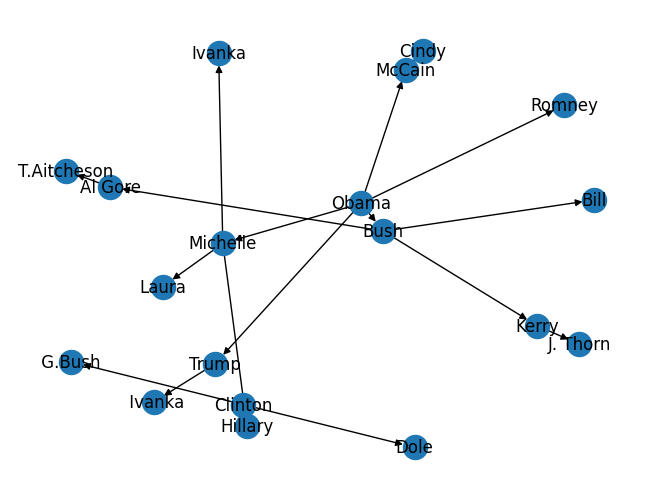

In [35]:
nx.draw(team_1, with_labels = True)

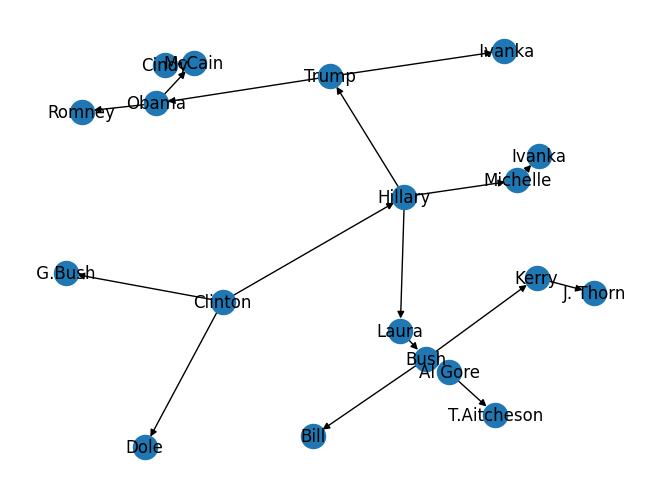

In [37]:
nx.draw(team_2, with_labels = True)

## Clustering coefficient for nodes.

In [13]:
nx.clustering(graph)

{'Clinton': 0,
 'Hillary': 0.16666666666666666,
 'Bush': 0,
 'Laura': 0.3333333333333333,
 'Obama': 0,
 'Michelle': 0.16666666666666666,
 'Trump': 0,
 ' Ivanka': 0,
 ' G.Bush ': 0,
 'Dole': 0,
 'Al Gore': 0,
 'Kerry': 0,
 'McCain': 0,
 'Romney': 0,
 'Bill': 0,
 'Ivanka': 0,
 'J. Thorn': 0,
 'T.Aitcheson': 0,
 'Cindy': 0}

## Community

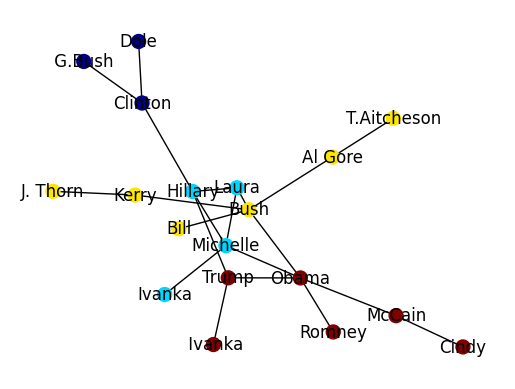

In [14]:
parts = community_louvain.best_partition(graph)
values = [parts.get(node) for node in graph.nodes()]
pos = nx.spring_layout(graph)
plt.axis("off")
nx.draw_networkx(graph, with_labels=True, pos = pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 100)